## 精准率-召回率曲线

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy() # 为了避免下面的代码出现冲突, copy一份

# 人为改变,使得数据变成二分类的问题
# 倾斜比较大的数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/yangqinjiang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 准备曲线的数据, threshold与精准率,召回率的关系

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# 保存曲线的数据
precisions = []
recalls = []

# x轴的数据点
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshold in thresholds:
    # 每次改变threshold, 计算不同threshold的情况下, 预测的结果也不同
    y_predict = np.array(decision_scores >= threshold,dtype='int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

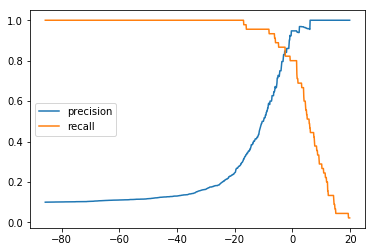

In [38]:
# 画图,直观表示
plt.plot(thresholds,precisions,label='precision')
plt.plot(thresholds,recalls,label='recall')
plt.legend()
plt.show()

### Precision-Recall曲线
- 两者之间的关系, 有断崖的曲线

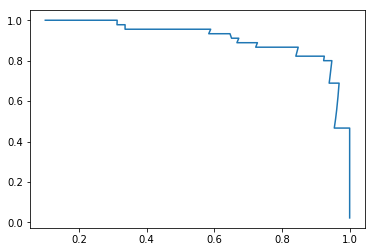

In [39]:
plt.plot(precisions,recalls)
plt.show()

### scikit-learn中的Precision-Recall曲线

In [40]:
from sklearn.metrics import precision_recall_curve

# 返回三个值
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [41]:
precisions.shape

(145,)

In [42]:
recalls.shape

(145,)

In [43]:
thresholds.shape

(144,)

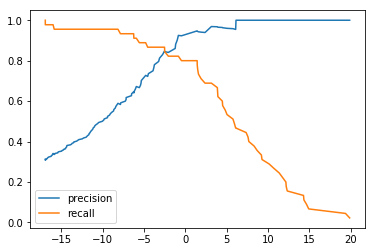

In [44]:
plt.plot(thresholds, precisions[:-1],label='precision') # 因为thresholds缺少一个数据,所以要保持一致
plt.plot(thresholds, recalls[:-1],label='recall')
plt.legend()
plt.show()

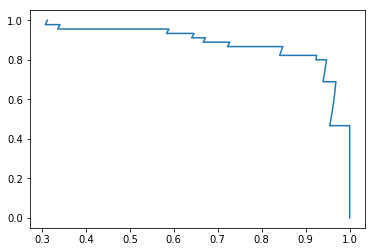

In [45]:
plt.plot(precisions, recalls)
plt.show()